# Introduction to phylogenetic comparative methods in R
Goettingen 2023  
Andrew Hipp, ahipp@mortonarb.org  
Tutorial 01a: Organizing data and scripts  
Use [static view in nbviewer](https://nbviewer.org/github/andrew-hipp/workshops/blob/master/2023-goettingen/Wk1-PhyData/2023-01a_organizingProjects.ipynb) if you are not working directly in Jupyter notebooks.

## Session 1a: Starting a phylogenetic comparative project in R

In this tutorial, I'll walk you around the file structure and files from a past study of diversification of the American oak clade, help you import and format the data, and be set to do analyses on those data. The steps we'll follow are:

* Getting the right software
* Setting up the file structure
* Identifying tasks in your analysis workflow and breaking them into scripts
* Importing data
* Manipulating data so it is ready for analysis
* Preliminary visualizations... checking that data is ready for analysis and makes sense

The goal in this is to set you up so that when you are analyzing data, you can iteratively perfect your analyses, and rerun them over and over easily as you edit data, refine your hypotheses, improve your analysis approaches or in any other way begin to think more clearly about what you are doing. Moreover, and as importantly, you can pass the whole thing off to a colleague or to the public or even to your future self (who will not remember everything your current self was thinking and doing at the time you analyzed your data) to analyze your data independently. This contributes to the repeatability of your research. If you want more information on the analyses conducted, see:

Hipp AL et al. 2018. New Phytologist 217: 439–452. https://doi.org/10.1111/nph.14773.

Data and scripts presented in this tutorial are adapted from the code reposity for this paper:

https://github.com/andrew-hipp/oak-convergence-2017


### 1. Getting the right software

I won't spend a lot of time on this point, because I expect that most of you have some <code>R</code> experience, but you will need at the minimum:

* A current version of <code>R</code>
* A good text editor for writing code. I favor [<code>Visual Studio Code</code>](https://code.visualstudio.com/), because it does a nice job of organizing files and is easy to use. You can run code directly within VS Code, debug, work on a remote server using ssh... the options are almost endless. Many people choose to use RStudio as an integrated development environment (IDE). I typically don't, because I like the control of working in a text editor that I like and tacking back and forth between my data files, scripts, and workspace. I've also just never learned RStudio. I consequently won't be covering it in this workshop, but you are welcome to use RStudio if you feel more comfortable in it or just want to explore it.
* A place to save your files. Don't laugh! You should think about this carefully... are you using Dropbox? GitHub? Your local drive? Depending on whether you are working on your own or collaboratively, this stuff matters. For my work, it generally makes the most sense to start with Dropbox while I am working on ideas, before I know whether a set of analyses is really going anywhere. I try to move to GitHub fairly quickly, though, as I find my work stays better organized this way.
* A few basic packages for phylogenetics. Again, I won't dwell on this, because every analysis leans on different techniques. I find that I use a few packages most heavily:<br>
<br>__ape__ for importing trees, looking at them, doing some basic visualizations of traits on trees;
<br>__phytools__ for more sophisticated visualizations of trait evolution;
<br>__geiger__ for trait simulation and fitting models of continuous trait evolution;
<br>__vegan__ for ordination, which I use a lot; and
<br>__ggplot2__ and __ggtree__ for visualization, because the approach to graphics implemented in these packages makes it easier to make some kinds of sophisticated data visualizations
<br>__maps__ to plot specimen data

All of these are available on <code>CRAN</code>, along with <code>R</code> itself, except for <code>ggtree</code>, which is on Bioconductor. Other packages we will discuss and use in this workshop are available from the authors directly or from Bioconductor.

In [1]:
dir('../')
# if you haven't already installed the needed packages, take a moment to do so. 

# If you are working within mac or windows, use:
# install.packages('ape', repos='http://cran.us.r-project.org')
# source("https://bioconductor.org/biocLite.R")
# biocLite("ggtree")

# if you are in linux and have installed R using anaconda, I strongly recommend using anaconda for packages:
# conda install -c conda-forge r-ape
# conda install -c bioconda bioconductor-ggtree
# ... or mamba if you have mamba installed

[1] "phyloLive"   "Wk1-PhyData"

[1] "phyloLive"   "Wk1-PhyData"

### 2. Setting up your files

You can start R right from your desktop and use the default directory for your workspace (see tutorial 1 if the concept of a workspace is not familiar to you), and this is often convenient for quick analyses, tests, ephemeral investigations that you have little need of referring back to. But any time you are embarking on a new project, I recommend creating a separate analysis directory just for that project that has at least three folders in it, one each for __data__, __scripts__, and __workspace__. I recommend keeping this directory parallel to your manuscript directory for the project, so that you can copy the whole thing as you create new versions, and archive the old versions by compressing them and giving them a date. 

For this tutorial, create a new folder for just this workshop called "phyloTutorials", and create a subfolder in there called "tutorial.01". In that subfolder, create the subfolders 'data', 'scripts', and 'workspace'. Then, launch R, and set 'workspace' as your working directory in R, using <code>setwd</code>.

In [2]:
## Take a moment and do this now. I use these commands, but this may differ for you:

if(length(grep('phyloLive', dir('../'))) == 0) {
    dir.create('../phyloLive') # you should set this directory where it makes the most sense for you
    setwd('../phyloLive')
    dir.create('tutorial.01')
    setwd('tutorial.01')
    dir.create('scripts')
    dir.create('data')
    dir.create('workspace')
    dir.create('out')
    } else {
    message('directory exists... not overwriting it')
    setwd('../phyloLive/tutorial.01')
}
  
setwd('workspace')

message('we are now working here')
getwd()

directory exists... not overwriting it

we are now working here



[1] "/home/andrew/Documents/github/workshops/2023-goettingen/phyloLive/tutorial.01/workspace"

### 3. Breaking a project down into tasks and organizing them into scripts

When you start a project, there are many ways to organize your work. I will be the first to confess that what I presenting here is imperfect, but I can at least walk you through the _logic_ behind this. First, let's talk about the tasks one usually needs to accomplish in a project that involves data and quantitative analysis (as most projects do):

* __1. Define variables and set up the workspace.__ In the course of analysis, you'll often find that the same packages are used over and over in different scripts, and the same variables are important to use in different analyses. I generally create scripts that are run early in the workflow to do this.
* __2. Import and format data.__ I generally set up scripts to import data and format it for the analyses I am performing early in the workflow. I try to consolidate all or most of the data import and formatting to these files, because it becomes difficult for me to follow my workflow if I start iteratively making copies of tables formatted for different analyses along the way... but honestly, I am not always consistent about this. As I revise the code, it generally gets better and cleaner. If you depend on software outside of R for analysis, you will sometimes have to add in multiple rounds of data import and formatting, because analyses later in the workflow often depend on analyses prepped in the earlier stages of the workflow. One alternative to this is to code your analyses to call the external programs directly, but I've only limited experience with this.
* __3. Analyze data.__ That's a big topic to bite off. This is what we'll discuss in the remaining sessions of this course.
* __4. Create figures and tables, and generate statistics that show up in the text of the paper.__ Your workflow should include the tables and figures that are going into your paper as well as the statistics that don't fit into the tables and figures. Ideally, I aim to have my analysis pipeline built such that I can walk through a series of ordered scripts (if nothing needs to be tweaked on the way through I prefer to create a master script that runs them all in order) and out pops all the analyses, pretty much as they show up in the paper. Then, when I am asking myself, "how did I get _that_ result?" I can just go back to the scripts and find it.  

In addition, depending on the complexity of the study, I often have another set of tasks sprinkled throughout:

* __Export data to other programs.__ In some scripts, I am scrubbing and reformatting data for other software... then, I typically have to read the data back in in the next script. These are the messiest parts of the workflow in my mind. I don't love them, but they are part of many pipelines.

At the beginning of your own project, try to break your analysis pipeline down into parts and start to write separate scripts for each of them. You will make your life easier in the long run.

In [28]:
## take a moment and create dummy files for this worksession. You'll fill them in as we go along.
if(!'01.readData.R' %in% dir('../scripts')) writeLines('', '../scripts/01.readData.R')
if(!'02.plotData.R' %in% dir('../scripts')) writeLines('', '../scripts/02.plotData.R')
dir('../scripts/')

[1] "01.readData.R" "02.plotData.R"

### CODING NOTE ###
Look for the `## SCRIPT 01 ##` or `## SCRIPT 02 ##` at the top of code blocks. These are code scraps you can start plugging into your script file as you go. Some portions of the code are optional, mainly because they display objects as we are going along. You can paste those into your script or not, as you prefer.

### 4. Importing data

The most common data formats we generally have to read in are tables, unformatted text files, DNA data and phylogenetic trees. In addition, I used RAD-seq data in this paper, so I utilize the <code>RADami</code> package to read in the .loci file from PyRAD to generate some statistics and export data files. A list of the commonly used functions is here, and we'll go over examples of data import below, pulling in the data we want to be able to work on in this project.

If you would like to work on different data in this workshop, that's fine! In fact, that's what I hope for. The examples below are really only meant as examples of how data can be organized and imported. We will take time for your to import your own data if you brought data, and we'll work through any difficulties.

#### Tabular data -- all functions are in the <code>base</code> package
* read.delim
* read.csv
* read.table

#### Text data, one element per line -- <code>base</code> package
* readLines

#### DNA data -- I am using the <code>ape</code> function here, but there are also functions in <code>seqinr</code>, <code>ShortRead</code>, <code>adephylo</code>, and other packages
* read.dna

#### Newick trees -- The first two functions are from <code>ape</code>, the last is from <code>phyloch</code>, which as I recall is only available from the author's website
* read.tree 
* read.nexus
* phyloch:::read.beast (http://www.christophheibl.de/Rpackages.html)

#### Locus file ouput from pyRAD -- from the <code>RADami</code> package
* read.pyRAD

#### Tabular data
Most tabular data will be exported from Excel or another spreadsheet software, or exported from a specialized piece of software. For the examples in this tutorial (and for the remainder of the class), we'll import the following data, all associated with a tree: 

* bioclimatic data
* biogeographic regions for each species
* leaf traits
* the phylogeny

Let's import them all, then in the next section we'll clean up the data so it's ready for analysis. We'll start with the bioclim data.

In [4]:
## SCRIPT 01 ##

path <- 'https://raw.githubusercontent.com/andrew-hipp/workshops/master/data/oaks2018/'
dat.bio <- read.csv(paste(path, 'oak.dat.eco.trimmed.csv', sep = ''), as.is = T)

If you look at the dimensions of the bioclim data, you find that there are more rows than we have 

In [5]:
dim(dat.bio)

[1] 5972   24

You probably know why: these rows hold specimens, not species, and we pulled our specimen data from GBIF and a variety of other sources. We'll have to summarize these data to analyze them. The example data here subsamples the data I used for the original paper, leaving a maximum of 50 individuals per species so that we can look at how you summarize data for these kinds of analyses. First, let's take a look at the data:

In [6]:
head(dat.bio)

,X,FID_,latitude,longitude,species,bio1,bio2,bio3,bio4,bio5,⋯,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
,<int>,<int>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,3550,35.07590,-94.39333,acerifolia,155,135,37,8070,335,⋯,256,48,1026,138,47,25,323,173,264,173
2,3,3850,35.00000,-93.00000,acerifolia,155,133,36,8068,334,⋯,255,46,1296,145,73,19,401,277,278,284
3,4,3886,35.21855,-93.72057,acerifolia,155,134,36,8179,337,⋯,257,47,1145,138,62,19,350,231,269,231
4,5,3887,35.16722,-93.64472,acerifolia,134,114,34,7733,301,⋯,231,32,1339,156,70,19,416,264,308,264
5,7,3912,34.56090,-118.19170,acutidens,138,137,42,6554,318,⋯,227,62,343,64,1,83,183,9,17,173
6,14,4402,33.63000,-117.37000,acutidens,147,143,50,5117,309,⋯,219,90,640,123,3,86,348,12,24,332


These coordinate data come from GBIF and other herbarium databases and represent individual samples. I then used the `dismo` and `raster` packages to extract [bioclim]('http://www.worldclim.org/bioclim') data for each specimen. I haven't scheduled time in the class to go over this, but let me know if you need some guidance on doing this for your data. I have already cleaned the data to remove duplicates and outliers, but you will want to do the same. A first step is mapping, so let's look at how you subset and map the data by species. First, we'll split the data by species:

In [7]:
## SCRIPT 01 ##
dat.bio.bySp <- split(dat.bio, dat.bio$species) # produces a list, one data frame each

Then we can map these, pushing each out as a pdf. First, let's create a directory so we don't clutter things up:

In [29]:
## SCRIPT 01 ##
if(!'maps' %in% dir('../out')) dir.create('../out/maps')

Then for each file we'll make a simple map, limiting ourselves to the portion of the world where the specimens we've collected come from:

In [9]:
## SCRIPT 01 ##
library(maps) # I generally put all the libraries I need at the top of the script

for(i in names(dat.bio.bySp)[1:10]) { # this creates an index, i, of the unique species names; 
                                      # we'll just do the first 10
    message(paste('doing map', i)) # gives us a status message so we know something is going on...
    jpeg(paste('../out/maps/', i, '.jpg', sep = ''), 800, 600) # opens a jpg file named by species, 800 x 600 pt
    map() # plots the base map; you can limit the range by lat and long using ylim and xlim
    title(i) # adds a title at the top of our map
    points(dat.bio.bySp[[i]]$longitude, 
           dat.bio.bySp[[i]]$latitude,
           pch = 21, col = 'black', bg = 'red', 
           cex = 2) # plot points, red with black outline, 2x normal size
    dev.off() # close pdf file
    } # close for loop

doing map acerifolia

doing map acutidens

doing map acutifolia

doing map affinis

doing map agrifolia

doing map ajoensis

doing map alba

doing map arizonica

doing map arkansana

doing map austrina



You might also choose to do this in a window, so you can see what's going on. As an example, here are the first three:

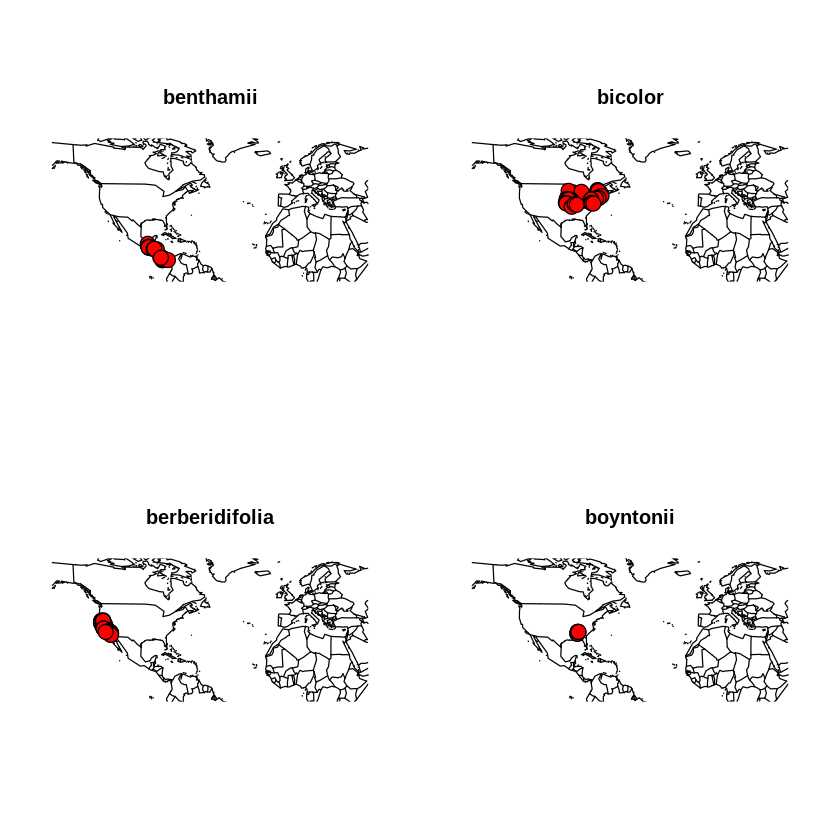

In [10]:
## SCRIPT 01 -- optional ##
layout(matrix(1:4, 2, 2)) # sets up a plotting layout, for multiple plots on a single panel 
for(i in names(dat.bio.bySp)[11:14]) {
    map(
        xlim = extendrange(r = range(dat.bio$longitude), f = 0.2),
        ylim = extendrange(r = range(dat.bio$latitude), f = 0.2)
        )
    title(i)
    points(dat.bio.bySp[[i]]$longitude, 
           dat.bio.bySp[[i]]$latitude,
           pch = 21, col = 'black', bg = 'red', 
           cex = 2) # plot points, red with black outline, 2x normal size
} # close for loop

The point here is that if you are using specimen data to infer any aspect of the environment that you will subsequently use in comparative analysis, you need to inspect the data first to make sure it is cleaned up. Remove outliers, duplicates, and data you just don't trust for any reason.

Once you've done this, you'll want an estimate of the mean and measurement error for each species. We'll again use our split data for this:

In [11]:
## SCRIPT 01 ##
numCols <- grep('lat|long|bio', names(dat.bio), value = T)
dat.bio.means <- t(sapply(dat.bio.bySp, function(x) apply(x[, numCols], 2, mean, na.rm = T)))

## SCRIPT 01 -- optional ##
head(dat.bio.means)

,latitude,longitude,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,⋯,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
acerifolia,35.11542,-93.68965,149.7500,129.0000,35.75000,8012.500,326.7500,-30.75000,357.5000,159.00,⋯,249.7500,43.2500,1201.50,144.25000,63.000000,20.50000,372.5000,236.25000,279.7500,238.0000
acutidens,33.11787,-116.93307,152.9400,142.2000,50.88000,4883.760,307.2600,29.44000,277.8200,101.54,⋯,220.6000,96.9600,447.74,83.46000,2.360000,80.52000,237.3200,16.66000,27.3800,220.2600
acutifolia,17.60283,-97.63987,211.3000,135.1400,68.32000,1507.820,308.2800,112.14000,196.1400,218.34,⋯,229.1600,190.6600,1224.24,256.14000,8.700000,96.02000,709.3800,32.84000,320.4600,58.8200
affinis,21.61818,-98.79716,158.9800,136.0800,63.02000,2416.820,264.2800,49.48000,214.8000,175.36,⋯,186.0600,125.1600,1126.52,228.56000,22.160000,73.98000,555.1600,79.34000,319.9200,107.2600
agrifolia,36.04875,-120.45043,147.7200,127.4200,52.84000,4028.120,279.7200,38.48000,241.2400,101.74,⋯,200.6600,98.9600,603.40,125.74000,1.140000,88.44000,331.2200,8.64000,17.0600,324.7600
ajoensis,31.80864,-112.47244,194.9048,152.6905,45.88095,6690.786,367.8571,37.30952,330.5476,279.50,⋯,281.8571,113.2857,301.00,58.90476,3.714286,63.02381,134.2381,16.07143,109.4286,83.2619


We've introduced a few super-useful functions in the three lines above, functions you can use in all sorts of situations. In order:

__`grep`__ searches for a pattern in a vector, and returns either the index (numbers) of the elements that contain the pattern or the values of those elements (if value = T). In our case above, we used a regular expression to match any of the names of dat.bio that contained "lat", "long", or "bio".

__`sapply`__ takes a list or single-dimensioned vectory (not a matrix!) and applies a function to each element of that; then, it tries to simplify the result to something other than a list. It is analogous to `lapply`, which does the same thing but without simplifying it. In our case, we get a matrix back.

__`apply`__ takes a matrix and applies a function to either the rows (if the second argument is 1, for the first dimension) or columns (if the second argument is 2), or to every cell individually (if the second argument is 1:2). 

__`t`__ transposes a matrix

__`head`__ shows the first 6 rows of a matrix or elements of a vector.

With these elements, you can do a whole lot! Let's use them again now to get a matrix holding the standard error of the mean for each value, instead of the mean. 

In [12]:
## SCRIPT 01 ##
dat.bio.sem <- t(sapply(dat.bio.bySp, function(x) {
    apply(x[, numCols], 2, sd, na.rm = T) / sqrt(dim(x)[1])
    } # close function
                        ) # close sapply
                 ) # close t

## SCRIPT 01 -- optional ##
head(dat.bio.sem)

,latitude,longitude,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,⋯,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
acerifolia,0.04847851,0.28486254,5.250000,5.016639,0.6291529,96.70789,8.605957,0.8539126,7.858117,14.577380,⋯,6.263319,3.772157,71.78034,4.250000,5.81664279,1.5000000,21.719807,23.1997665,9.852030,24.265888
acutidens,0.05109032,0.05390315,2.374595,2.365224,0.3754073,125.60133,2.969891,3.4520813,5.312726,3.375205,⋯,1.575838,3.481843,16.99534,2.995535,0.09797959,0.7081104,8.658814,1.3369505,2.062867,8.009984
acutifolia,0.16925370,0.45379633,4.336203,2.454984,0.5982560,46.93299,4.263949,4.9438488,3.329523,4.382396,⋯,4.287653,4.508913,48.45582,9.268204,1.37328743,1.7772921,28.258051,4.3609922,14.244231,8.670931
affinis,0.33307246,0.19563960,5.807278,2.251864,0.6709664,114.58724,6.468198,4.8835618,3.886660,6.664237,⋯,6.674680,4.782311,72.38574,13.070458,1.71484753,1.4204024,35.061641,5.6055810,13.504038,12.033552
agrifolia,0.28757159,0.31758639,2.053775,3.798076,0.5695397,180.81114,6.383911,2.7741136,8.502800,2.251858,⋯,3.972519,2.196279,31.00820,7.030186,0.09901556,1.1274533,17.135243,0.8019161,1.659705,17.558870
ajoensis,0.23810800,0.09287141,4.348069,2.160378,0.5992663,129.84861,5.560936,3.7932160,4.669221,5.163781,⋯,5.109779,3.962115,20.01768,2.965698,0.54770741,1.6725175,7.620180,2.0108281,6.499544,5.930791


This all looks well and good unless you look too closely... because some of our species are represented by only one specimen, they can't have a standard deviation. Take a look:

In [13]:
## SCRIPT 01 ##

temp.na = names(which(table(dat.bio$species) == 1))

## SCRIPT 01 -- optional ##
print(temp.na)
dat.bio.sem[temp.na, ]

[1] "corrugata"   "delgadoana"  "macranthera" "petraea"     "sp1"        


,latitude,longitude,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,⋯,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
corrugata,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
delgadoana,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
macranthera,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
petraea,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
sp1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


So what can we do here? For those samples, we estimate the standard error by taking the _average_ standard deviation for all other species for each variable, and divide by the square root of the sample size (which is 1 for each of these taxa):

In [14]:
## SCRIPT 01 ##
temp.sd <- apply(t(sapply(dat.bio.bySp, function(x) apply(x[, numCols], 2, sd, na.rm = T))),
    2,
    mean, 
    na.rm = T) # the mean of the standard deviation for all these variables
dat.bio.sem[temp.na, ] <- matrix(temp.sd, length(temp.na), length(temp.sd), byrow = T)
                   
## SCRIPT 01 -- optional ##
dat.bio.sem[temp.na, ]

,latitude,longitude,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,⋯,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
corrugata,1.944825,2.952805,23.27152,14.14365,5.066697,783.7035,25.8859,28.42491,29.76154,37.80072,⋯,24.71178,29.40398,247.2692,45.28163,103.7876,13.27135,121.2037,30.97414,80.181,68.32916
delgadoana,1.944825,2.952805,23.27152,14.14365,5.066697,783.7035,25.8859,28.42491,29.76154,37.80072,⋯,24.71178,29.40398,247.2692,45.28163,103.7876,13.27135,121.2037,30.97414,80.181,68.32916
macranthera,1.944825,2.952805,23.27152,14.14365,5.066697,783.7035,25.8859,28.42491,29.76154,37.80072,⋯,24.71178,29.40398,247.2692,45.28163,103.7876,13.27135,121.2037,30.97414,80.181,68.32916
petraea,1.944825,2.952805,23.27152,14.14365,5.066697,783.7035,25.8859,28.42491,29.76154,37.80072,⋯,24.71178,29.40398,247.2692,45.28163,103.7876,13.27135,121.2037,30.97414,80.181,68.32916
sp1,1.944825,2.952805,23.27152,14.14365,5.066697,783.7035,25.8859,28.42491,29.76154,37.80072,⋯,24.71178,29.40398,247.2692,45.28163,103.7876,13.27135,121.2037,30.97414,80.181,68.32916


Okay! We've done the hard work... now let's import the easy data.

In [15]:
## SCRIPT 01 ##

# Because this is reading in data, I'll put it up at the top of the script with other data-reading
# sections for each species:
dat.sections <- read.csv(paste(path, 'sect.species.translate.csv', sep = ''), as.is = T, row.names = 1)

# geography for each species:
dat.geog <- read.csv(paste(path, 'spp.geog.csv', sep = ''), as.is = T, row.names = 1)

# and leaf traits:
dat.lf <- read.delim(paste(path, 'lfPhenology.2016-03-09.jcb.tsv', sep = ''), row.names = 1, as.is = T)

These tables provide sectional names for each species, and make it easy to generate lists of taxa for subsequent analyses...

In [16]:
## SCRIPT 01 -- optional ##
head(dat.sections)

,Species,Section,subclade,compound.section
,<chr>,<chr>,<chr>,<chr>
Castanea_dentata,,outgroup,,
Castanopsis_fissa,,outgroup,,
Lithocarpus_hancei,,outgroup,,
Quercus_acerifolia,acerifolia,Lobatae,ENA,Lobatae - ENA
Quercus_acutidens,acutidens,Quercus - American,MX.SW,Quercus - American - MX.SW
Quercus_acutifolia,acutifolia,Lobatae,MX.SW,Lobatae - MX.SW


... biogeographic coding ...

In [17]:
## SCRIPT 01 -- optional ##
head(dat.geog)

,C,E,M,U
,<int>,<int>,<int>,<int>
Castanea_dentata,0,0,0,1
Castanopsis_fissa,0,0,0,1
Lithocarpus_hancei,0,0,0,1
Quercus_acerifolia,0,1,0,0
Quercus_acutidens,1,0,0,0
Quercus_acutifolia,0,0,1,0


... and leaf trait coding:

In [18]:
## SCRIPT 01 -- optional ##
head(dat.lf[, c('lfPhenology', 'References.used'), drop = FALSE])

,lfPhenology,References.used
,<chr>,<chr>
Castanea_dentata,Deciduous,Observation (MOR)
Castanopsis_fissa,Evergreen,genus trait (Flora of China)
Lithocarpus_hancei,Evergreen,genus trait (Flora of China)
Quercus_acerifolia,Deciduous,FNA
Quercus_acutidens,,
Quercus_acutifolia,Deciduous,common garden in Mexico


OKAY!!! We're almost done getting our data in! Let's get a phylogeny.


Phylogenetic tree with 153 tips and 152 internal nodes.

Tip labels:
  Quercus_turbinella, Quercus_ajoensis, Quercus_toumeyi, Quercus_grisea, Quercus_oblongifolia, Quercus_engelmannii, ...

Rooted; includes branch lengths.


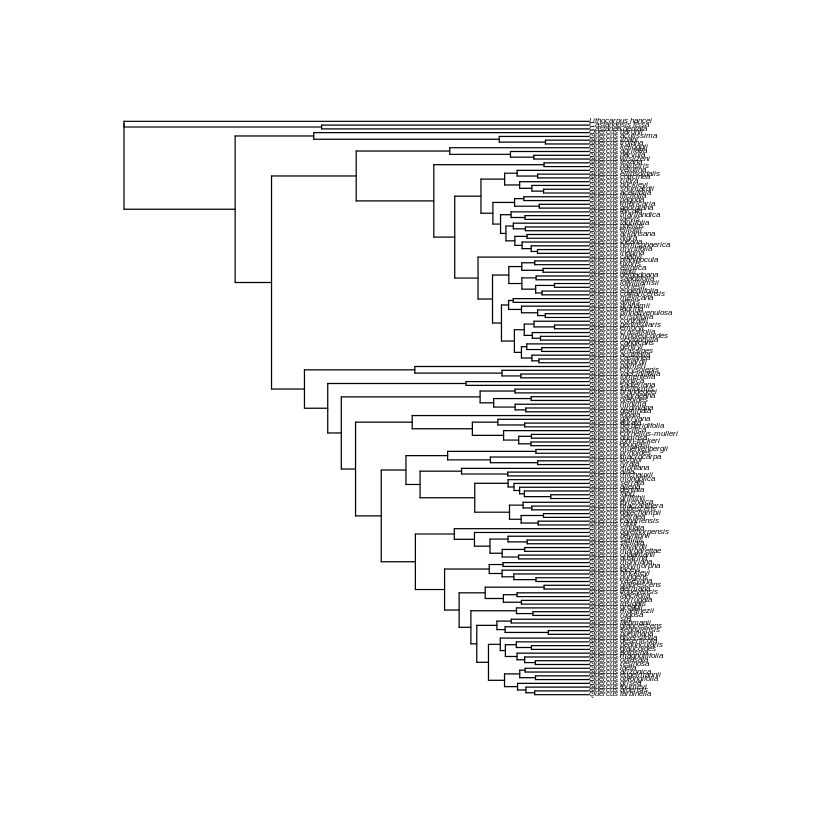

In [19]:
## SCRIPT 01 ##
library(ape) # put this at the very top of the script, just so your libraries are in one place

# Because this is reading in data, I'll put it up at the top of the script with other data reading
tr <- read.nexus(paste(path, 'trs.calib.jackknife.4.annotated.tre', sep = '')) 

## SCRIPT 01 -- optional ##
print(tr)
plot(tr, cex = 0.4)

#### 5. Getting our trees and data for ready analysis
The very last thing we will do in this tutorial before saving files and moving onto data visualization is to make sure our data all match up. I typically keep my datasets all separate and prune them at the time of analysis, so that for example an analysis of leaf traits takes advantage of my full leaf trait dataset, while an analysis of climatic niche alone takes advantage of the full bioclim dataset. This makes things messy though, so for ease of downstream analyses, we'll make all of our datasets match up in this step. The steps here are, briefly:

* Identifying common taxa between datasets
* Renaming tips and matrix rows to match up
* Pruning trees and matrices to match up

##### Identifying taxa in common
You may have noticed in the tables above that every table we have imported has row names of form `Genus_species`, except for the bioclim data. Ideally, you have names like this fixed up b/f you begin to import data, but it's often the case that you don't. So let's fix that up before we go on using paste:

In [20]:
## SCRIPT 01 ##
if(identical(row.names(dat.bio.means), row.names(dat.bio.sem)))
    row.names(dat.bio.means) <- row.names(dat.bio.sem) <- paste('Quercus', row.names(dat.bio.means), sep = '_')

## SCRIPT 01 -- optional ##
print(head(row.names(dat.bio.means)))


[1] "Quercus_acerifolia" "Quercus_acutidens"  "Quercus_acutifolia"
[4] "Quercus_affinis"    "Quercus_agrifolia"  "Quercus_ajoensis"  


Okay. That looks better. Now just to know what things look like, let's compare all the datasets to an intersected set of names. You can either create an intersection set of just two vectors at a time using `intersect`, like this:

In [21]:
## SCRIPT 01 -- optional##

spp.intersect <- intersect(tr$tip.label, row.names(dat.bio.means))
spp.intersect <- intersect(spp.intersect, row.names(dat.geog))
spp.intersect <- intersect(spp.intersect, row.names(dat.lf))
spp.intersect <- intersect(spp.intersect, row.names(dat.sections))

## SCRIPT 01 -- optional ##
length(spp.intersect)

[1] 133

or you can do it more compactly, by using the `Reduce` function to call `intersect` -- the former simply reduces a list to a set of binary actions:

In [22]:
## SCRIPT 01 ##

spp.intersect <- Reduce(intersect, list(tr$tip.label,
                                      row.names(dat.bio.means),
                                      row.names(dat.geog),
                                      row.names(dat.lf),
                                      row.names(dat.sections)))

## SCRIPT 01 -- optional ##
length(spp.intersect)

[1] 133

The difference here is really only one of stayle and readability. I favor the second because I am not calling the function over and over... I suspect there is no savings in computation time, but the computation time here is trivial. Use what is more sensible to you.

Now, before I go chopping off branches and data, I like to see what I am losing. You can do this using the `setdiff` function:

In [23]:
## SCRIPT 01 -- optional ##

message('Extra tips : Tree')
print(setdiff(tr$tip.label, spp.intersect))
message('Extra tips : bioclim')
print(setdiff(row.names(dat.bio.means), spp.intersect))
message('Extra tips : geog')
print(setdiff(row.names(dat.geog), spp.intersect))
message('Extra tips : leaf data')
print(setdiff(row.names(dat.lf), spp.intersect))
message('Extra tips : sections')
print(setdiff(row.names(dat.sections), spp.intersect))

Extra tips : Tree



 [1] "Quercus_copeyensis"   "Quercus_hinckleyi"    "Quercus_dalechampii" 
 [4] "Quercus_pubescens"    "Quercus_pyrenaica"    "Quercus_griffithii"  
 [7] "Quercus_fabri"        "Quercus_dentata"      "Quercus_aliena"      
[10] "Quercus_serrata"      "Quercus_mongolica"    "Quercus_pontica"     
[13] "Quercus_lowilliamsii" "Quercus_trojana"      "Quercus_libani"      
[16] "Quercus_acutissima"   "Quercus_baronii"      "Castanea_dentata"    
[19] "Castanopsis_fissa"    "Lithocarpus_hancei"  


Extra tips : bioclim



[1] "Quercus_acutidens"     "Quercus_benthamii"     "Quercus_gambelii"     
[4] "Quercus_graciliformis" "Quercus_gravesii"      "Quercus_ocoteifolia"  
[7] "Quercus_sartorii"     


Extra tips : geog



 [1] "Castanea_dentata"      "Castanopsis_fissa"     "Lithocarpus_hancei"   
 [4] "Quercus_acutidens"     "Quercus_acutissima"    "Quercus_aliena"       
 [7] "Quercus_baronii"       "Quercus_benthamii"     "Quercus_boissieri"    
[10] "Quercus_copeyensis"    "Quercus_dalechampii"   "Quercus_dentata"      
[13] "Quercus_fabri"         "Quercus_faginea"       "Quercus_graciliformis"
[16] "Quercus_gravesii"      "Quercus_griffithii"    "Quercus_hinckleyi"    
[19] "Quercus_libani"        "Quercus_lowilliamsii"  "Quercus_mongolica"    
[22] "Quercus_ocoteifolia"   "Quercus_pontica"       "Quercus_pubescens"    
[25] "Quercus_pyrenaica"     "Quercus_sartorii"      "Quercus_serrata"      
[28] "Quercus_trojana"      


Extra tips : leaf data



 [1] "Castanea_dentata"      "Castanopsis_fissa"     "Lithocarpus_hancei"   
 [4] "Quercus_acutidens"     "Quercus_acutissima"    "Quercus_aliena"       
 [7] "Quercus_baronii"       "Quercus_benthamii"     "Quercus_copeyensis"   
[10] "Quercus_dalechampii"   "Quercus_dentata"       "Quercus_fabri"        
[13] "Quercus_faginea"       "Quercus_gambelii"      "Quercus_graciliformis"
[16] "Quercus_gravesii"      "Quercus_griffithii"    "Quercus_hinckleyi"    
[19] "Quercus_libani"        "Quercus_lowilliamsii"  "Quercus_mongolica"    
[22] "Quercus_ocoteifolia"   "Quercus_pontica"       "Quercus_pubescens"    
[25] "Quercus_pyrenaica"     "Quercus_sartorii"      "Quercus_serrata"      
[28] "Quercus_trojana"      


Extra tips : sections



 [1] "Castanea_dentata"      "Castanopsis_fissa"     "Lithocarpus_hancei"   
 [4] "Quercus_acutidens"     "Quercus_acutissima"    "Quercus_aliena"       
 [7] "Quercus_baronii"       "Quercus_benthamii"     "Quercus_boissieri"    
[10] "Quercus_copeyensis"    "Quercus_dalechampii"   "Quercus_dentata"      
[13] "Quercus_dysophylla"    "Quercus_fabri"         "Quercus_faginea"      
[16] "Quercus_gambelii"      "Quercus_graciliformis" "Quercus_gravesii"     
[19] "Quercus_griffithii"    "Quercus_hinckleyi"     "Quercus_libani"       
[22] "Quercus_lowilliamsii"  "Quercus_mongolica"     "Quercus_ocoteifolia"  
[25] "Quercus_polycarpa"     "Quercus_pontica"       "Quercus_pubescens"    
[28] "Quercus_pyrenaica"     "Quercus_sartorii"      "Quercus_serrata"      
[31] "Quercus_sternbergii"   "Quercus_trojana"      


You can see that we are throwing away a bunch of leaf data and geographic data so just to match up with the bioclim data. This is why I tend to subset individual datasets separately for different analyses, generally creating datasets with `cleaned` as a suffix or some such thing. But for simplicity, let's subset them all to the same set of data, and just write over the data.frames so that we don't have a cluttered workspace. We'll use the `drop.tip` function for the tree:

In [24]:
## SCRIPT 01 ##

tr <- drop.tip(tr, which(!tr$tip.label %in% spp.intersect))

In the above, we have used:
* `%in%`, which returns a boolean vector that is `TRUE` for each element of `tr$tip.label` that is in `spp.intersect` and `FALSE` for each element that is not
* `!` (the "NOT" operator in R) to reverse the boolean vector
* `which`, which returns a numeric vector indexing the values of a boolean vector that == `TRUE`
* `drop.tip` to drop tips from a tree, identified by string (name) or, as in our case, numeric position.

Now, we'll use the `[` operator to subset our matrices by `row.name`:

In [25]:
## SCRIPT 01 ##

dat.bio.means <- dat.bio.means[spp.intersect, ]
dat.bio.sem <- dat.bio.sem[spp.intersect, ]
dat.geog <- dat.geog[spp.intersect, ]
dat.lf <- dat.lf[spp.intersect, ]
dat.sections <- dat.sections[spp.intersect, ]

Finally, because I'm a nervous Nellie, I'll check to make sure that the names really all line up:

In [26]:
## SCRIPT 01 -- optional ##

print(head(
    cbind(bio = row.names(dat.bio.means), geog = row.names(dat.geog), 
            lf = row.names(dat.lf), sect = row.names(dat.sections)),
    10))


      bio                    geog                   lf                    
 [1,] "Quercus_turbinella"   "Quercus_turbinella"   "Quercus_turbinella"  
 [2,] "Quercus_ajoensis"     "Quercus_ajoensis"     "Quercus_ajoensis"    
 [3,] "Quercus_toumeyi"      "Quercus_toumeyi"      "Quercus_toumeyi"     
 [4,] "Quercus_grisea"       "Quercus_grisea"       "Quercus_grisea"      
 [5,] "Quercus_oblongifolia" "Quercus_oblongifolia" "Quercus_oblongifolia"
 [6,] "Quercus_engelmannii"  "Quercus_engelmannii"  "Quercus_engelmannii" 
 [7,] "Quercus_arizonica"    "Quercus_arizonica"    "Quercus_arizonica"   
 [8,] "Quercus_laeta"        "Quercus_laeta"        "Quercus_laeta"       
 [9,] "Quercus_resinosa"     "Quercus_resinosa"     "Quercus_resinosa"    
[10,] "Quercus_obtusata"     "Quercus_obtusata"     "Quercus_obtusata"    
      sect                  
 [1,] "Quercus_turbinella"  
 [2,] "Quercus_ajoensis"    
 [3,] "Quercus_toumeyi"     
 [4,] "Quercus_grisea"      
 [5,] "Quercus_oblongifolia"
 

And we're set to analyze our data now! WHEW! This set up often is a rather time-consuming part of a project, but doing it right from the get-go makes your life easier. We'll close this session by saving our workspace in a place where we can easily load it for the next tutorial:

In [30]:
save.image(file = '../data/phylo.session01a.Rdata') # places this in the phyloTutorials folder

### Using your script
Hopefully you have been building script `01.readData.R` as we go along. In a real coding session, I work iteratively between the R interactive session and my code, prototyping lines in R, coding them into my script, then sourcing the whole thing in regularly using `source('../scripts/01.readData.R`. 

Try it yourself: navigate to the `working` directory, launch R, and source in your script. See if it works! If it does, celebrate. If not, don't despair: it will after you horse around with it a bit. Call me over if you get stuck! 

### FOR INDEPENDENT WORK
To make the most of this tutorial, take your own datasets that you would like to analyze for this class and organize them into a data folder, then write a script that reads them and processes them for analysis. Setting up your analysis pipeline as a set of scripts that can be read in using `source` will make your analyses easier to follow and replicate.

### POSSIBLE DISCUSSION TOPICS

* Relative benefits and downside of using RStudio or other IDE vs a code editor and the command line
* File storage: Dropbox, Git / Subversion, local drives... when to use what?
* Functions vs strings of code: how much can you  do as a function, and what are the benefits? If you are functionalizing analyses, how general should functions be? At what stage do you spin analyses you are writing off into functions that may be of general utility?

### Addendum: A list of functions you may find handy for data cleanup
As you clean up your data and prepare for analysis, you will want the treasure trove of data accessing, matching, searching and subsetting tools present in R. We've used some of them here, but here is a short list of the functions I use most commonly.

##### Cleaning names, changing names to match one another
* duplicated
* unique
* make.unique

* []
* grep
* match
* strsplit
* which

* names
* rownames
* dimnames

* gsub
* paste

* lapply
* apply
* sapply
* split


##### Subsetting and reordering data
* Tables
* Vectors
* Trees
<br>-- multi2di 
<br>-- chronos
<br>-- ladderize
<br>-- drop.tip

##### Exporting manipulated data so that you know exactly what you did
* write.csv
* writeLines
* write.tree
* rad2phy
* dput
* save